<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/DM_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
# dataset
import pandas as pd
data = pd.read_csv("/content/iris_csv.csv")

In [2]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'], axis=1), data["class"])

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [6]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

# Start Revision

- transductive: une seule etape
- inductive:
  
  - apprentissage: construction du modèle
  - test: vérification du modèle
  - validation du modèle
  - application du modèle

## Classification

- KNN
- Decision Trees
- SVM
- Naive Bayes
- Logistic Regression

### KNN

In [7]:
'''
1. Distance entre le nouveau element et les elements d'apprentissage (Euclidienne - Quantitatives / Manhattan - Plusieurs Types)
2. Les k voisins proches
3. La classes majoritaire des voisins sera la classe de l'element
- Amélioration: Pondération et contribution des distances
- Cons: garder l'ensemble de jeu en mémoire / choix de k et méthodes de calcule de distance exige d'essayer plusieurs combinaisons
'''
from sklearn import neighbors
clf_knn = neighbors.KNeighborsClassifier(5)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('accuracy_score \n', accuracy_score(y_test, y_pred))
print('precision_score \n', precision_score(y_test, y_pred, average=None))
print('recall_score \n', recall_score(y_test, y_pred, average=None))
print('f1_score \n', f1_score(y_test, y_pred, average=None))
print('classification_report \n', classification_report(y_test, y_pred))



accuracy_score 
 1.0
precision_score 
 [1. 1. 1.]
recall_score 
 [1. 1. 1.]
f1_score 
 [1. 1. 1.]
classification_report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



### Decision Tree

In [8]:
'''
- classification / regression
- données numériques / données catégorielles
- arbre complexe -> explique mieux l'ensemble d'apprentissage -> peut avoir un overfitting
- BUT: trouver le plus petite arbre explicant l'ensemble d'apprentissage
- RACINE: l'attribut le plus important en haut
- FIN: impossible de séparer les individus / un critère d'arret d'approfondissement soit satisfait
  - X^2 (arbres CHAID, vars explicatives qualitatives)
  - Gini (arbres CART, tout)
  - Twoing (arbres CART, var cible > 3 modalités)
  - Entrepie (arbres C4.5 C5.0)
  - Atteint d'une limite de profondeur / limte des feuils / l'effictif tous les neouds min / qualité suffisante / qualité n'augment plus
   d'une manière sensible
- Selection des attributs (variantes):
  - CHAID (CHi-Squared Automation Interaction Detection) -> khi2
  - CART (Classification And Regression Tree) -> maximiser la pureté des neouds
  - C5.0 (amélioration de ID3 et C4.5) -> maximiser le gain d'information réalisé
- Avantages:
  - simple à comprendre et à visualiser
  - peu de préparation de données
  - peu d'influence des données aberrantes, sauf aux frontières interclasses
  - cout d'utilisation est logarithmique
  - des problèmes multi-classes
  - des données catégorielles et numériques
  - durée de traitement
- Inconvinients:
  - la dépendence des niveaux
  - variables testées séquentiellement et pas simultanément
  - manque de robustesse
'''
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)
print('accuracy_score \n', accuracy_score(y_test, y_pred))
print('precision_score \n', precision_score(y_test, y_pred, average=None))
print('recall_score \n', recall_score(y_test, y_pred, average=None))
print('f1_score \n', f1_score(y_test, y_pred, average=None))
print('classification_report \n', classification_report(y_test, y_pred))


accuracy_score 
 0.9736842105263158
precision_score 
 [1.         1.         0.93333333]
recall_score 
 [1.  0.9 1. ]
f1_score 
 [1.         0.94736842 0.96551724]
classification_report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



[Text(0.4, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [36, 40, 36]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.75, 'X[2] <= 4.95\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(0.2, 0.5833333333333334, 'X[3] <= 1.65\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'X[0] <= 6.05\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'X[3] <= 1.7\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.6, 0.25, 'X[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.7,

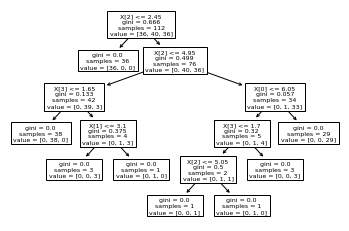

In [9]:
tree.plot_tree(clf_tree)

### SVM

In [10]:
'''
- frontière qui sépare le mieux les catégories (linièaires)
- hyperplan qui maximise la marge (loin que possible des catégories)
- les points les plus proches (vecteurs supports)
- kernel trick -> les classes non linéairement séparables
  - fonction noyeau pour la redescription: polynomial, gaussien, laplacien, rationnel
- kernel (type de noyeau): poly, linear, rbf, sigmoid, precomputed
- gamma (coefficient de noyeau): scale / auto
- shrinking (utilisation de l'heuristique rétrécissante)
'''
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=1.0).fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X_train, y_train)
svm_poly = SVC(kernel='poly', degree=3, C=1.0).fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
print('accuracy_score \n', accuracy_score(y_test, y_pred))
print('precision_score \n', precision_score(y_test, y_pred, average=None))
print('recall_score \n', recall_score(y_test, y_pred, average=None))
print('f1_score \n', f1_score(y_test, y_pred, average=None))
print('classification_report \n', classification_report(y_test, y_pred))


accuracy_score 
 1.0
precision_score 
 [1. 1. 1.]
recall_score 
 [1. 1. 1.]
f1_score 
 [1. 1. 1.]
classification_report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



### Naive Bayes

In [11]:
'''
- théorème de Bayes (probabilité conditionnelle)
- principe de l'existence d'une forte indépendance entre les variables du modèle
- les variables sont simples -> terme naif
- classe estimée = qui maximise la probabilité conditionnelle
- parfaite pour la classification des textes
- lois:
  - caractéristiques discrètes: loi multinomial
  - caractéristiques binaires: loi de Bernoulli
  - caractéristiques continues: loi normale (gaussienne)
- Avantages:
  - très rapide pour la classification (calcule de probabilité)
  - classification meme si avec un petit jeu de données
- inconvénients:
  - s'il y a une grande corrélation entre les caractéristiques -> mauvais résultats
  - les caractéristiques continues doivent suivre la loi normale
'''
from sklearn.naive_bayes import GaussianNB
clf_nb_gaussian = GaussianNB()
y_pred = clf_nb_gaussian.fit(X=X_train, y=y_train).predict(X_test)

print('accuracy_score \n', accuracy_score(y_test, y_pred))
print('precision_score \n', precision_score(y_test, y_pred, average=None))
print('recall_score \n', recall_score(y_test, y_pred, average=None))
print('f1_score \n', f1_score(y_test, y_pred, average=None))
print('classification_report \n', classification_report(y_test, y_pred))

accuracy_score 
 0.9473684210526315
precision_score 
 [1.    1.    0.875]
recall_score 
 [1.  0.8 1. ]
f1_score 
 [1.         0.88888889 0.93333333]
classification_report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        38
      macro avg       0.96      0.93      0.94        38
   weighted avg       0.95      0.95      0.95        38



### Logistic Regression

In [12]:
'''
- classification par probabilité (fonction logistique: sigmoid)
- optimisation de coefficients avec la descente du dradient
- binaire / multinomiale / ordinale
'''
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
y_pred = clf_lr.fit(X_train, y_train).predict(X_test)

print('accuracy_score \n', accuracy_score(y_test, y_pred))
print('precision_score \n', precision_score(y_test, y_pred, average=None))
print('recall_score \n', recall_score(y_test, y_pred, average=None))
print('f1_score \n', f1_score(y_test, y_pred, average=None))
print('classification_report \n', classification_report(y_test, y_pred))

accuracy_score 
 0.9473684210526315
precision_score 
 [1.         0.9        0.92857143]
recall_score 
 [1.         0.9        0.92857143]
f1_score 
 [1.         0.9        0.92857143]
classification_report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Ensemble Learning - Random Forest

In [13]:
'''
- combinaison des modèles (faible prédiction) pour avoir une prédiction efficace
- familles: 
  -méthode parallèle _moyenne de plusieurs prédictions_ (Random Forest / Baggin)
  -méthode séquentiel _params adaptés itérativement_ -> meilleur mélange_ (boosting - XGBoost / AdaBoost)
- combinaison:
  - vote: indépendament les uns les autres
  - coopération: chacun pour un problème
  - décisions dépendantes: elimination d'hypothèse
- Random Forest: apprentissage sur plusieurs arbres de décision, entrainés sur des sous ensembles légèrement differents
  - classification multi-classe (étiquettes discréts + plusieurs classes)
'''
from sklearn.ensemble import RandomForestClassifier
clf_randomf = RandomForestClassifier()
y_pred = clf_randomf.fit(X_train, y_train).predict(X_test)

print('accuracy_score \n', accuracy_score(y_test, y_pred))
print('precision_score \n', precision_score(y_test, y_pred, average=None))
print('recall_score \n', recall_score(y_test, y_pred, average=None))
print('f1_score \n', f1_score(y_test, y_pred, average=None))
print('classification_report \n', classification_report(y_test, y_pred))

accuracy_score 
 0.9736842105263158
precision_score 
 [1.         1.         0.93333333]
recall_score 
 [1.  0.9 1. ]
f1_score 
 [1.         0.94736842 0.96551724]
classification_report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



## Linear Regression

In [14]:
'''
- univarié: y = ax + b 
- multiple: y = a1.x1 + a2.x2 + ... + ak.xk + b
- généraliste: matrice Y = A.X + B (B estimé par méthode des moidres carrés ordinaires)
'''
from sklearn.linear_model import LinearRegression
r_lr = LinearRegression()
y_pred = r_lr.fit(diabetes_X_train, diabetes_y_train).predict(diabetes_X_test)

print(r_lr.coef_, '\n')
print(r_lr.score(diabetes_X_test, diabetes_y_test))
print(diabetes_X_test.shape)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01] 

0.5850753022690575
(20, 10)


### Régression Régularisée - Ridge / Lasso / Elasticnet

In [15]:
'''
extensions de linear regression pour éviter le sur-apprentissage
- Ridge: trouver un coefficient qui va diminuer le poids de tous les params-> éviter l'apprentissage sur tous les sens
- Lasso: sélectionner des variables et éliminer des autres, plus sévère que Ridge
- Elasticnet.
'''
from sklearn.linear_model import Ridge
r_ridge = Ridge(alpha=1.0)
y_pred = r_ridge.fit(diabetes_X_train, diabetes_y_train)

print(r_ridge.coef_, '\n')
print(r_ridge.score(diabetes_X_test, diabetes_y_test))
print(diabetes_X_test.shape)

[  34.27253573  -80.06235273  296.73036586  199.14438365    6.14639012
  -26.10294287 -150.21661191  119.4044712   254.49896275  115.68515613] 

0.44250075713127157
(20, 10)


### Régression Polynomiale

In [16]:
'''
une fonction polynome pour décrire la relation entre nos paramètres
NB: data +100k -> DL, Logistic Regression, Descente du Gradient (SGDClassifier / SGDRegressor)
'''

'\nune fonction polynome pour décrire la relation entre nos paramètres\nNB: data +100k -> DL, Logistic Regression, Descente du Gradient (SGDClassifier / SGDRegressor)\n'

## Model Evaluation

In [17]:
'''
- Classification: matrice de confusion / courbe ROC / AUC / accuracy / précision / rappel / specificity / f1_score
- Regression: erreur de prédiction / R-squared (elevée -> bon modèle) / RMSE (faible -> bon modèle) / MSE (pénalise les grands erreurs plus) 
  / MAE
- Clustering: variance intra classe

ROC (Receiver Operating Charactiristic): TPR (recall) en fonction des FPR (1-specificité)
AUC (aire sous ROC): l'intégrale de ROC de (0,0) à (1,1)

- classification_report -> le max des mesures de performance
- 
'''

"\n- Classification: matrice de confusion / courbe ROC / AUC / accuracy / précision / rappel / specificity / f1_score\n- Regression: erreur de prédiction / R-squared (elevée -> bon modèle) / RMSE (faible -> bon modèle) / MSE (pénalise les grands erreurs plus) \n  / MAE\n- Clustering: variance intra classe\n\nROC (Receiver Operating Charactiristic): TPR (recall) en fonction des FPR (1-specificité)\nAUC (aire sous ROC): l'intégrale de ROC de (0,0) à (1,1)\n\n- classification_report -> le max des mesures de performance\n- \n"

## Features Selection

In [18]:
'''
- tests d'indépendance
  - 2 quantitatives -> Correlation de Pearson
  - 2 qualitatives -> Chi2
  - 1 / 1 -> Fihcer avec analyse de la variance (ANOVA)
- features selection: 
  - SelectKBest
  - P_values, Scores_, Get_Support
  - GridSearchCV: paramètres optimaux
- hypothèse: p-value > 5% -> indépendantes
- scipy.stats
- régression -> pearson / classification -> chi2 + anova
'''

"\n- tests d'indépendance\n  - 2 quantitatives -> Correlation de Pearson\n  - 2 qualitatives -> Chi2\n  - 1 / 1 -> Fihcer avec analyse de la variance (ANOVA)\n- features selection: \n  - SelectKBest\n  - P_values, Scores_, Get_Support\n  - GridSearchCV: paramètres optimaux\n- hypothèse: p-value > 5% -> indépendantes\n- scipy.stats\n- régression -> pearson / classification -> chi2 + anova\n"

## Model Validation

In [19]:
'''
cross validation -> for small datasets
- k-folds
- leave one out
'''

'\ncross validation -> for small datasets\n- k-folds\n- leave one out\n'

## Save the Model

In [20]:
'''
sérialisation -> pickle or joblib
dump -> load
'''

'\nsérialisation -> pickle or joblib\ndump -> load\n'